In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes

In [40]:
df = pd.read_csv("../Data/cleanedSample.csv",low_memory=False)

In [41]:
numerical_data = df[['Longitude', 'Latitude']]
categorical_data = df[['Day', 'Violation Code', 'Street',"Time Range"]]

In [42]:
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

In [43]:
data_scaled = pd.concat([pd.DataFrame(numerical_data_scaled,columns=numerical_data.columns), categorical_data], axis=1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 492999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 492999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 492999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 492999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 492999.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9460, cost: 472009.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1113, cost: 472894.0
Init: initializing centroids
Init: initializing clusters
Start

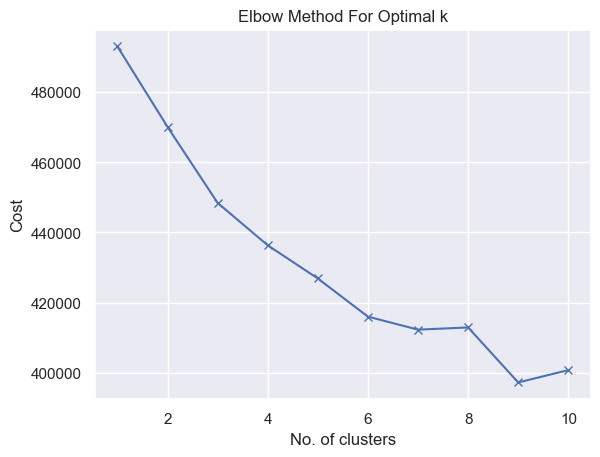

In [44]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_scaled)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [53]:
kmodes = KModes(n_clusters = 9, init = "random", n_init = 5, verbose=1)
kmodes.fit_predict(data_scaled)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24081, cost: 416831.0
Run 1, iteration: 2/100, moves: 2504, cost: 416775.0
Run 1, iteration: 3/100, moves: 533, cost: 416764.0
Run 1, iteration: 4/100, moves: 2, cost: 416764.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 18217, cost: 419150.0
Run 2, iteration: 2/100, moves: 5079, cost: 418920.0
Run 2, iteration: 3/100, moves: 93, cost: 418920.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6611, cost: 432744.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 24546, cost: 401836.0
Run 4, iteration: 2/100, moves: 973, cost: 401836.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 20307, cost: 404175.0
Run 5, iteration: 2/

array([6, 2, 4, ..., 7, 2, 1], dtype=uint16)

In [61]:
labels = kmodes.labels_
data_scaled['Cluster'] = labels
data_scaled = data_scaled.astype({"Violation Code":"int","Cluster":"int"})

<Axes: xlabel='Longitude', ylabel='Latitude'>

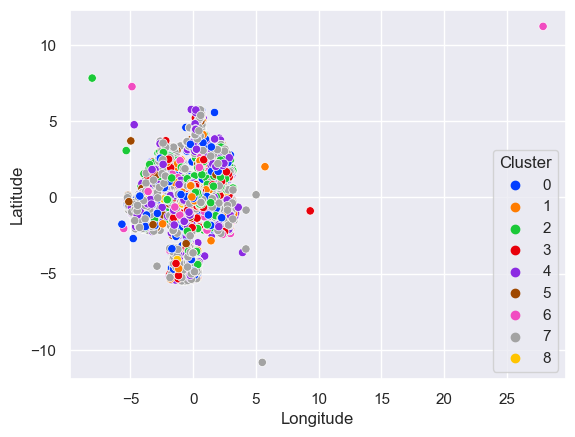

In [62]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=data_scaled, palette=palette)

In [63]:
Q1 = data_scaled[['Longitude', 'Latitude']].quantile(0.25)
Q3 = data_scaled[['Longitude', 'Latitude']].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where either column is outside of the IQR range
df_filtered = data_scaled[~((data_scaled[['Longitude', 'Latitude']] < (Q1 - 1.5 * IQR)) | (data_scaled[['Longitude', 'Latitude']] > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: xlabel='Longitude', ylabel='Latitude'>

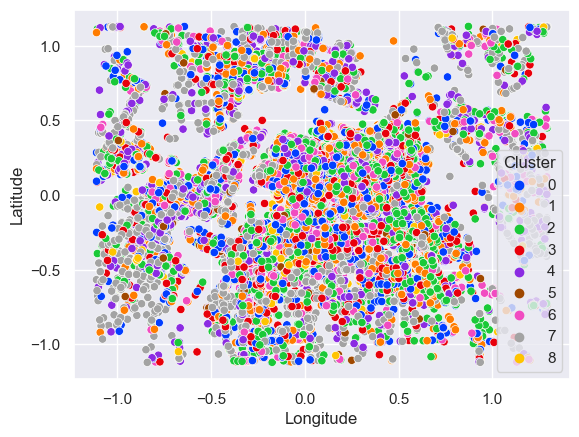

In [64]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df_filtered, palette=palette)

In [65]:
cluster_modes = data_scaled.groupby('Cluster').apply(lambda x: x.mode().iloc[0])
print(cluster_modes)

0        Longitude  Latitude        Day  Violation Code         Street  \
Cluster                                                                  
0        -0.110222  0.033894  Wednesday             1.0    Edmonton ST   
1         0.032215  0.205799   Thursday             1.0   McDermot AVE   
2         0.555881  0.162041    Tuesday             1.0  Bannatyne AVE   
3         0.627099  0.177669     Monday             1.0    William AVE   
4         0.304521  0.168292     Friday             6.0    William AVE   
5        -2.942207 -0.138012   Saturday            12.0    Lombard AVE   
6         0.363172  0.162041     Friday             1.0    Hargrave ST   
7        -3.423979 -0.156765     Sunday            39.0    William AVE   
8        -0.332257  0.168292   Thursday             3.0       Broadway   

0                               Time Range  Cluster  
Cluster                                              
0                  Daytime (9:00am-3:30pm)      0.0  
1                  Dayt

In [68]:
cluster_modes.to_csv("../Data/K-Modes_Cluster_Info.csv",index=False)

In [69]:
data_scaled

,Longitude,Latitude,Day,Violation Code,Street,Time Range,Cluster
0,0.018809,0.143726,Friday,1,Donald ST,Daytime (9:00am-3:30pm),6
1,0.312900,0.374579,Thursday,1,Bannatyne AVE,Daytime (9:00am-3:30pm),2
2,-0.213070,0.074057,Monday,13,Kennedy ST,Evening (5:00pm-11:00pm),4
3,0.044573,0.184452,Tuesday,1,St Mary AVE,Daytime (9:00am-3:30pm),2
4,-1.116570,0.078495,Wednesday,1,Osborne ST,Daytime (9:00am-3:30pm),0
...,...,...,...,...,...,...,...
99995,-0.002837,-0.059092,Wednesday,13,Vaughan ST,Daytime (9:00am-3:30pm),0
99996,-0.108618,0.088903,Thursday,1,Edmonton ST,Rush Hour Morning (7:30am-9:00am),1
99997,0.622910,-0.328671,Wednesday,3,William AVE,Rush Hour Morning (7:30am-9:00am),7
99998,0.185754,0.333603,Tuesday,1,Pioneer AVE,Rush Hour Evening (3:30pm-5:00pm),2


In [71]:
noLocdf = df[['Day', 'Violation Code', 'Street',"Time Range"]]
noLocdf

,Day,Violation Code,Street,Time Range
0,Friday,1,Donald ST,Daytime (9:00am-3:30pm)
1,Thursday,1,Bannatyne AVE,Daytime (9:00am-3:30pm)
2,Monday,13,Kennedy ST,Evening (5:00pm-11:00pm)
3,Tuesday,1,St Mary AVE,Daytime (9:00am-3:30pm)
4,Wednesday,1,Osborne ST,Daytime (9:00am-3:30pm)
...,...,...,...,...
99995,Wednesday,13,Vaughan ST,Daytime (9:00am-3:30pm)
99996,Thursday,1,Edmonton ST,Rush Hour Morning (7:30am-9:00am)
99997,Wednesday,3,William AVE,Rush Hour Morning (7:30am-9:00am)
99998,Tuesday,1,Pioneer AVE,Rush Hour Evening (3:30pm-5:00pm)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 293240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 293240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 293240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 293240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 293240.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 130, cost: 278033.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8039, cost: 270074.0
Init: initializing centroids
Init: initializing clusters
Starti

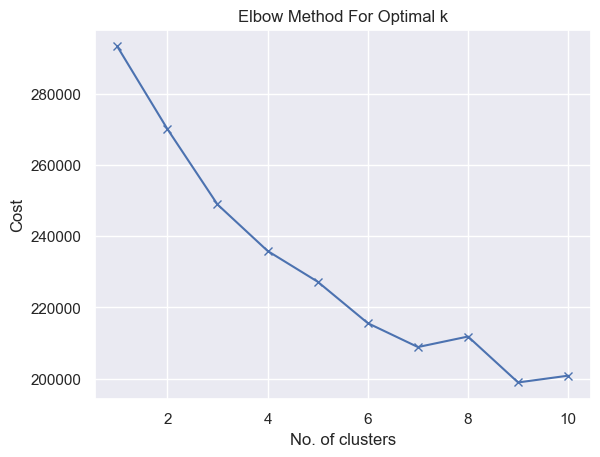

In [73]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(noLocdf)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [74]:
kmodes = KModes(n_clusters = 9, init = "random", n_init = 5, verbose=1)
kmodes.fit_predict(noLocdf)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13801, cost: 211295.0
Run 1, iteration: 2/100, moves: 3366, cost: 210844.0
Run 1, iteration: 3/100, moves: 313, cost: 210844.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16760, cost: 214205.0
Run 2, iteration: 2/100, moves: 348, cost: 214205.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 37333, cost: 207307.0
Run 3, iteration: 2/100, moves: 258, cost: 207307.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 36834, cost: 210409.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 14249, cost: 210318.0
Best run was number 3


array([2, 3, 0, ..., 0, 0, 2], dtype=uint16)

In [75]:
labels2 = kmodes.labels_
noLocdf['Cluster'] = labels2
noLocdf = noLocdf.astype({"Violation Code":"int","Cluster":"int"})
cluster_modes2 = noLocdf.groupby('Cluster').apply(lambda x: x.mode().iloc[0])
print(cluster_modes2)

0             Day  Violation Code          Street  \
Cluster                                             
0          Monday               3     William AVE   
1        Thursday              39     William AVE   
2          Friday               1    McDermot AVE   
3        Thursday               5   Bannatyne AVE   
4         Tuesday               5     Balmoral ST   
5        Saturday              16  RUE DESPINS ST   
6          Monday               1     Hargrave ST   
7          Friday               6     William AVE   
8          Friday               6      Market AVE   

0                               Time Range  Cluster  
Cluster                                              
0        Rush Hour Evening (3:30pm-5:00pm)        0  
1               Overnight (11:00pm-5:30am)        1  
2                  Daytime (9:00am-3:30pm)        2  
3                  Daytime (9:00am-3:30pm)        3  
4                  Daytime (9:00am-3:30pm)        4  
5                  Daytime (9:00am-3:3

C:\Users\User\AppData\Local\Temp\ipykernel_17480\1408041939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noLocdf['Cluster'] = labels2


<Axes: xlabel='Longitude', ylabel='Latitude'>

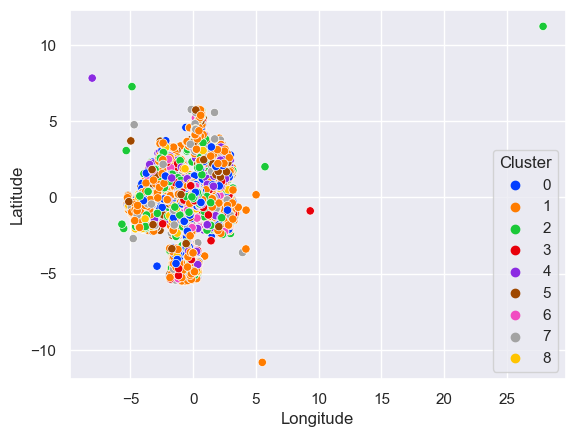

In [77]:
graphData = pd.concat([pd.DataFrame(numerical_data_scaled,columns=numerical_data.columns), noLocdf], axis=1)
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=graphData, palette=palette)

In [78]:
Q1 = graphData[['Longitude', 'Latitude']].quantile(0.25)
Q3 = graphData[['Longitude', 'Latitude']].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where either column is outside of the IQR range
df_filtered2 = graphData[~((graphData[['Longitude', 'Latitude']] < (Q1 - 1.5 * IQR)) | (graphData[['Longitude', 'Latitude']] > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: xlabel='Longitude', ylabel='Latitude'>

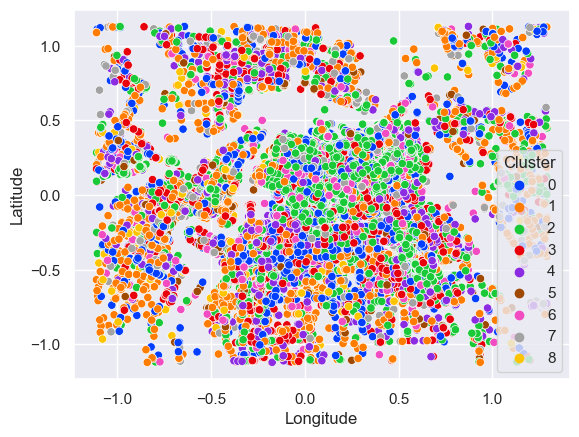

In [80]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df_filtered2, palette=palette)